# Домашнее задание

# Задание № 0

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность  = 3;
- дисперсия   = 225;
- уровень доверия  = 0.95.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
Delta = 3 # точность интервальной оценки
# уровень доверия = 0.95, соответственно уровень значимости a = 0,05, соответственно квантиль при уровне 1-a/2  Za = 2.241
Z = 2.241 
D = 225 # Дисперсия
sigma = D** .5 # стандартное отклонение
N = ((sigma*Z)/Delta)**2
print (f'минимально необходимы объем выборки {N}')

минимально необходимы объем выборки 125.552025


# Задание № 1

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [3]:
def confidence_interval(n, m,sigma, confidence=0.98):
    Z = scipy.stats.t.ppf((1 + confidence)/2, n) #   квантиль при уровне 1-a/2 где a = 1-confidence
    Delta = (sigma/(n** .5))*Z
    return m-Delta, m, m+Delta

print(confidence_interval(25,130,12))

(124.03574277901446, 130, 135.96425722098553)


# Задание № 2
Даны две выборки роста мужчин и женщин.

Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен  𝛼  = 0.001.
Покажите различия визуально

In [4]:
import scipy.stats as stats
np.random.seed(21)  # Загрепим seed для воспроизводимости результата
population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)   # Выборка женщин со средним ростом 165
# stats.ttest_ind(population_men, population_women)
stats.ttest_ind(population_men, population_women, equal_var = False)

Ttest_indResult(statistic=1.1722712942137945, pvalue=0.24111137098987193)

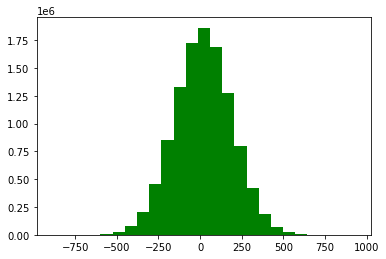

In [5]:
"""pvalue=0.24111137098987193 > 0.001 , соответственно аргументов не достаточно, 
что бы отвергнуть нулевую гипотезу о незначительном различии м/у выборками, 
соответственно Не отвергая нулевую гипотезу, можно заявить различие между выборками незначительно"""
plt.hist(population_men, bins=25, color='g'); # Выборка мужчин со средним ростом 171

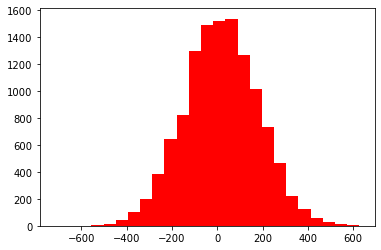

In [6]:
plt.hist(population_women, bins=25, color='r');  # Выборка женщин со средним ростом 165

# Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.¶

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [7]:
Delta = 50 # Погрешность
# уровень доверия = 0.95, соответственно уровень значимости a = 0,05, соответственно квантиль при уровне 1-a/2  Za = 2.241
Z = 2.241 
sigma = 150 # стандартное отклонение
N = ((sigma*Z)/Delta)**2
print (f'минимально необходимы объем выборки {N}')

минимально необходимы объем выборки 45.19872900000001


# Задание № 4

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05`


In [8]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [9]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(observations)
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = scipy.stats.chi2.ppf(p, dof)
chi

p-value is:  0.35396880166541644


0.8591780821917808

In [40]:
critical_value

3.841458820694124

In [10]:
print('chi=%.6f, критическое значение=%.6f\n' % (chi, critical_value))

chi=0.859178, критическое значение=3.841459



In [39]:
if chi > critical_value:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы. Маг действительно умеет предсказывать погоду""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы. 
         У нас нет достаточных доказательств, чтобы утверждать, что маг умеет предсказывать погоду""" % (significance))

На 0.05 уровене значимости, мы принимаем нулевые гипотезы. 
         У нас нет достаточных доказательств, чтобы утверждать, что маг умеет предсказывать погоду


In [12]:
oddsratio, pvalue = stats.fisher_exact(observations)
oddsratio, pvalue
if pvalue < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы. Маг действительно умеет предсказывать погоду""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы. 
         У нас нет достаточных доказательств, чтобы утверждать, что маг меет предсказывать погоду""" % (significance))

На 0.05 уровене значимости, мы принимаем нулевые гипотезы. 
         У нас нет достаточных доказательств, чтобы утверждать, что маг меет предсказывать погоду


# Задание № 5

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:


In [13]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [14]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.90):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [15]:
print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


# Задание № 6

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.


In [16]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [17]:
t , p  = stats.ttest_ind(data_1, data_2,  equal_var = False)
print("t = " + str(t))
print("p = " + str(p))                         

t = 7.068404675178226
p = 2.4974180382616264e-09


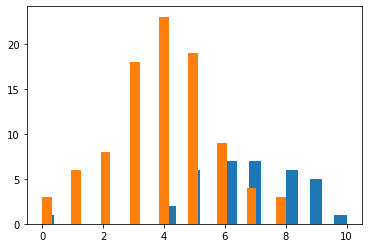

In [18]:
# Большое значение t-score= 7.068404675178226 говорит нам, что группы отличаются
# p_value=2.4974180382616264e-09 < 0.05 , соответственно аргументов достаточно, 
# таким образом, мы отклоняем нулевую гипотезу и, таким образом,
# это доказывает, что средние значения двух распределений различны и различие статистически значимо.
plt.hist(data_1, bins=25); 
plt.hist(data_2, bins=25);

# Задание № 7 
(задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

In [19]:
"""Ответ: так как p-value = 0.03 < 0,05 ,  
таким образом, мы отклоняем нулевую гипотезу и это доказывает  - распределение нормальное """

'Ответ: так как p-value = 0.03 < 0,05 ,  \nтаким образом, мы отклоняем нулевую гипотезу и это доказывает  - распределение нормальное '

# Задание № 8
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [20]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

In [ ]:
"""Нулевая гипотеза - значимых различий м/у эффективностью препарата А и В нет
   Альтеранативная гипотеза - имеется значимое различие эффективности препаратов А и B"""

In [21]:
A.std()

48.3021318445119

In [32]:
A.mean()

9.988742616116626

In [28]:
B.std()

50.110935919381795

In [34]:
B.mean()

2.4025645142681946

In [36]:
print(confidence_interval(300,9.9887,48.3))

(3.4666012009811684, 9.9887, 16.51079879901883)


In [37]:
print(confidence_interval(300,2.4026,50.11))

(-4.36390871260525, 2.4026, 9.16910871260525)


In [22]:
all_patients=np.concatenate((A,B))
all_patients.mean()

6.195653565192412

In [23]:
stats.ttest_ind(A,B)

Ttest_indResult(statistic=1.8847229265385363, pvalue=0.05995194857529052)

In [38]:
"""Достачных оснований для утверждения, что между препаратами А и В есть значимые различия мы не имеем
так как pvalue=0.05995194857529052 > уровня значимости 0.05. Существует 5,9 % вероятности,что  различия являются чисто случайными 
и объясняются «естественной» дисперсией выбранной характеристики.
При минимальном pvalue = 0,05, различия были бы уже значимы"""

'Достачных оснований для утверждения, что между препаратами А и В есть значимые различия мы не имеем\nтак как pvalue=0.05995194857529052 > уроня значимости 0.05. Существует 5,9 % ,что  различия являются чисто случайными \nи объясняются «естественной» дисперсией выбранной характеристики.\nПри минимальном pvalue = 0,05, различиябыли бы уже значимы'

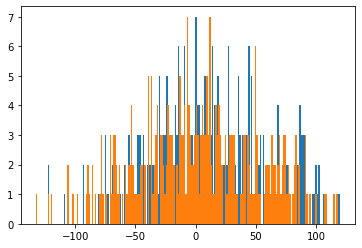

In [25]:
plt.hist(A, bins=200);
plt.hist(B, bins=200);

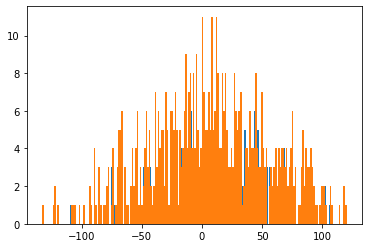

In [26]:
plt.hist(A, bins=200);
plt.hist(all_patients, bins=200);

In [27]:
stats.ttest_ind(all_patients, A, equal_var=False)

Ttest_indResult(statistic=-1.1009228581713186, pvalue=0.27136494270817024)